# 辐射gamma射线的混合型超新星遗迹

% all from vink 2020

超新星遗迹辐射伽马射线源往往有两种起源，强子起源与轻子起源，研究其的关系可以更好的帮助我们理解宇宙粒子逃脱的过程。

超新星被认为是保持银河系宇宙射线群的起源。

混合型超新星遗迹也往往与VHE伽马射线源相关联。根据Chicago TeV catalogue (http://tevcat.uchicago.edu/)，我们从文献中收集到的谱信息。需要注意，有一些TeV谱是很具假设一个纯幂律谱一盒的，厄尔其他的谱可能是从一个有截断的幂律谱拟合的。

Index(['SNR_id', 'source_id', 'energy_domain', 'instrument',
       'angular_resolution', 'source', 'year'],
      dtype='object')
['X' 'gamma_TeV' 'gamma_GeV' 'gamma_MeV']


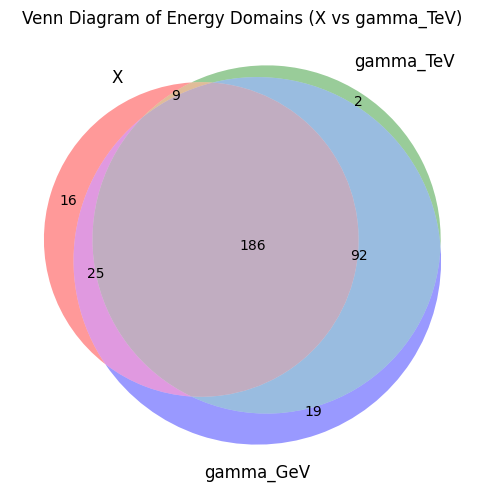

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
# 读取 CSV 文件
file_path = "../cat/SNRcat20250115-OBS.csv"  # 请替换为你的 CSV 文件路径
df = pd.read_csv(file_path, delimiter=';',skiprows=2)
print(df.columns)

print(df['energy_domain'].unique())
# 处理维恩图数据
x_sources = set(df[df["energy_domain"] == "X"]["SNR_id"])
gamma_teV_sources = set(df[df["energy_domain"] == "gamma_TeV"]["SNR_id"])
# gamma_GeV
gamma_GeV_sources = set(df[df["energy_domain"] == "gamma_GeV"]["SNR_id"])
# gamma_MeV
gamma_MeV_sources = set(df[df["energy_domain"] == "gamma_MeV"]["SNR_id"])
# 画维恩图
plt.figure(figsize=(6, 6))
venn3([x_sources, gamma_teV_sources, gamma_GeV_sources], set_labels=('X', 'gamma_TeV', 'gamma_GeV'))
plt.title("Venn Diagram of Energy Domains (X vs gamma_TeV)")
plt.show()

<Figure size 800x600 with 0 Axes>

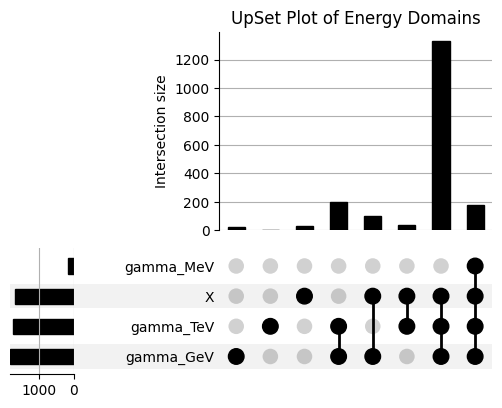

In [3]:
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_indicators

# 创建 DataFrame 处理集合
df_upset = pd.DataFrame({
    "X": df["SNR_id"].isin(x_sources),
    "gamma_TeV": df["SNR_id"].isin(gamma_teV_sources),
    "gamma_GeV": df["SNR_id"].isin(gamma_GeV_sources),
    "gamma_MeV": df["SNR_id"].isin(gamma_MeV_sources),
})

# 绘制 UpSet 图
plt.figure(figsize=(8, 6))
UpSet(from_indicators(["X", "gamma_TeV", "gamma_GeV", "gamma_MeV"], df_upset)).plot()
plt.title("UpSet Plot of Energy Domains")
plt.show()